In [9]:
# learn bpe from training data Ancient Greek
!subword-nmt learn-bpe -s 32000 < textfiles/train_sh_grc.txt > textfiles/sub_modelsh_grc.txt

100%|####################################| 32000/32000 [03:38<00:00, 146.45it/s]


In [14]:

!subword-nmt apply-bpe -c textfiles/sub_modelsh_grc.txt < textfiles/train_sh_grc.txt > textfiles/sub_trainsh_grc.txt # Apply to train
!subword-nmt apply-bpe -c textfiles/sub_modelsh_grc.txt <  textfiles/test_sh_grc.txt > textfiles/sub_testsh_grc.txt #Apply to test
!subword-nmt apply-bpe -c textfiles/sub_modelsh_grc.txt <  textfiles/valid_sh_grc.txt > textfiles/sub_validsh_grc.txt

In [15]:
!subword-nmt get-vocab <textfiles/sub_trainsh_grc.txt > textfiles/vocabsh_grcsh.txt 

In [10]:
# learn bpe from training data English
!subword-nmt learn-bpe -s 32000 < textfiles/train_sh_en.txt > textfiles/sub_modelsh_en.txt

100%|####################################| 32000/32000 [01:36<00:00, 332.24it/s]


In [22]:

!subword-nmt apply-bpe -c textfiles/sub_modelsh_en.txt < textfiles/train_sh_en.txt > textfiles/sub_trainsh_en.txt # Apply to train
!subword-nmt apply-bpe -c textfiles/sub_modelsh_en.txt <  textfiles/test_sh_en.txt > textfiles/sub_testsh_en.txt #Apply to test
!subword-nmt apply-bpe -c textfiles/sub_modelsh_en.txt <  textfiles/valid_sh_en.txt > textfiles/sub_validsh_en.txt

In [20]:
!subword-nmt get-vocab <textfiles/sub_trainsh_en.txt > textfiles/vocabsh_ensh.txt 

In [18]:
!onmt_preprocess -train_src bpe_subword_models/subword_train_grc.txt -train_tgt bpe_subword_models/subword_train_en.txt -valid_src bpe_subword_models/subword_valid_grc.txt -valid_tgt bpe_subword_models/subword_valid_en.txt -save_data data

/bin/bash: line 1: python: command not found


In [2]:
!onmt_build_vocab -config config1.yaml -n_sample 10000

Corpus corpus_1's weight should be given. We default it to 1 for you.
[2023-07-05 17:43:51,930 INFO] Counter vocab from 10000 samples.
[2023-07-05 17:43:51,930 INFO] Build vocab on 10000 transformed examples/corpus.
[2023-07-05 17:44:10,288 INFO] Counters src: 152700
[2023-07-05 17:44:10,288 INFO] Counters tgt: 66617


In [5]:
def count_tokens(line):
    tokens = line.split()  # Split the line into tokens
    return len(tokens)  # Return the number of tokens in the line

def main(filename):
    total_tokens = 0
    total_lines = 0

    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()  # Remove leading and trailing whitespaces
            if line:  # Skip empty lines
                total_tokens += count_tokens(line)
                total_lines += 1

    if total_lines > 0:
        average_tokens_per_line = total_tokens / total_lines
        print(f"Average tokens per line: {average_tokens_per_line:.2f}")
    else:
        print("No lines in the file.")

if __name__ == "__main__":
    input_filename = "texts_en.txt"  
    main(input_filename)

Average tokens per line: 114.18


In [9]:
def count_tokens(line):
    tokens = line.split()  # Split the line into tokens
    return len(tokens)  # Return the number of tokens in the line

def main(filename):
    total_tokens = 0
    total_lines = 0

    with open(filename, 'r', encoding='utf-8') as file:
        for line in file:
            line = line.strip()  # Remove leading and trailing whitespaces
            if line:  # Skip empty lines
                total_tokens += count_tokens(line)
                total_lines += 1

    if total_lines > 0:
        average_tokens_per_line = total_tokens / total_lines
        print(f"Average tokens per line: {average_tokens_per_line:.2f}")
    else:
        print("No lines in the file.")

if __name__ == "__main__":
    input_filename = "texts_grc.txt"  
    main(input_filename)

Average tokens per line: 77.67


In [13]:
def count_sentence_length(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        for line_num, line in enumerate(lines, start=1):
            sentence = line.strip().split()  # Split sentence into tokens/words
            sentence_length = len(sentence)
            print(f"Sentence {line_num}: Length = {sentence_length} tokens")

if __name__ == "__main__":
    input_filename = "train_texts_en.txt"
    count_sentence_length(input_filename)


Sentence 1: Length = 82 tokens
Sentence 2: Length = 15 tokens
Sentence 3: Length = 25 tokens
Sentence 4: Length = 51 tokens
Sentence 5: Length = 66 tokens
Sentence 6: Length = 107 tokens
Sentence 7: Length = 114 tokens
Sentence 8: Length = 61 tokens
Sentence 9: Length = 141 tokens
Sentence 10: Length = 82 tokens
Sentence 11: Length = 119 tokens
Sentence 12: Length = 25 tokens
Sentence 13: Length = 34 tokens
Sentence 14: Length = 11 tokens
Sentence 15: Length = 88 tokens
Sentence 16: Length = 21 tokens
Sentence 17: Length = 74 tokens
Sentence 18: Length = 2 tokens
Sentence 19: Length = 22 tokens
Sentence 20: Length = 10 tokens
Sentence 21: Length = 100 tokens
Sentence 22: Length = 289 tokens
Sentence 23: Length = 83 tokens
Sentence 24: Length = 57 tokens
Sentence 25: Length = 75 tokens
Sentence 26: Length = 385 tokens
Sentence 27: Length = 44 tokens
Sentence 28: Length = 24 tokens
Sentence 29: Length = 49 tokens
Sentence 30: Length = 111 tokens
Sentence 31: Length = 1 tokens
Sentence 32

In [10]:
def count_sentence_length(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        lines = file.readlines()
        for line_num, line in enumerate(lines, start=1):
            sentence = line.strip().split()  # Split sentence into tokens/words
            sentence_length = len(sentence)
            print(f"Sentence {line_num}: Length = {sentence_length} tokens")

if __name__ == "__main__":
    input_filename = "train_texts_grc.txt"
    count_sentence_length(input_filename)

Sentence 1: Length = 54 tokens
Sentence 2: Length = 14 tokens
Sentence 3: Length = 16 tokens
Sentence 4: Length = 41 tokens
Sentence 5: Length = 39 tokens
Sentence 6: Length = 67 tokens
Sentence 7: Length = 84 tokens
Sentence 8: Length = 41 tokens
Sentence 9: Length = 82 tokens
Sentence 10: Length = 52 tokens
Sentence 11: Length = 74 tokens
Sentence 12: Length = 17 tokens
Sentence 13: Length = 32 tokens
Sentence 14: Length = 7 tokens
Sentence 15: Length = 59 tokens
Sentence 16: Length = 14 tokens
Sentence 17: Length = 54 tokens
Sentence 18: Length = 2 tokens
Sentence 19: Length = 15 tokens
Sentence 20: Length = 8 tokens
Sentence 21: Length = 65 tokens
Sentence 22: Length = 175 tokens
Sentence 23: Length = 49 tokens
Sentence 24: Length = 37 tokens
Sentence 25: Length = 55 tokens
Sentence 26: Length = 243 tokens
Sentence 27: Length = 32 tokens
Sentence 28: Length = 24 tokens
Sentence 29: Length = 51 tokens
Sentence 30: Length = 67 tokens
Sentence 31: Length = 1 tokens
Sentence 32: Length

In [20]:
# cutting sentences up to 20 tokens
def rewrite_and_cut_long_sentences(input_filename, output_filename, max_tokens):
    with open(input_filename, 'r', encoding='utf-8') as input_file, \
         open(output_filename, 'w', encoding='utf-8') as output_file:
        lines = input_file.readlines()
        for line in lines:
            sentence = line.strip().split()  # Split sentence into tokens/words
            if len(sentence) > max_tokens:
                sentence = sentence[:max_tokens]  # Cut to max_tokens
            new_line = ' '.join(sentence)
            output_file.write(new_line + '\n')

if __name__ == "__main__":
    input_filename = "translation29_detok_30000.txt"
    max_tokens = 20
    output_filename = "translation29_detok_30000_cut20.txt"
    rewrite_and_cut_long_sentences(input_filename, output_filename, max_tokens)
    print("Rewriting and cutting complete.")


Rewriting and cutting complete.


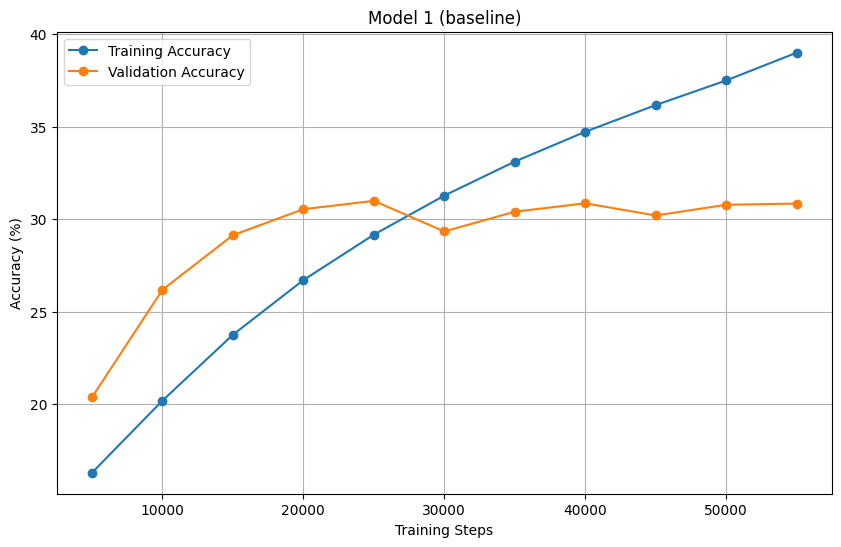

In [14]:
import matplotlib.pyplot as plt
import numpy as np

train_accuracy = [
    16.2933, 20.1912, 23.7502, 26.7038, 29.1591,
    31.27, 33.1082, 34.7199, 36.1623, 37.4919,
    38.9928
]

validation_accuracy = [
    20.3716, 26.1826, 29.1326, 30.5365, 30.9859,
    29.3331, 30.3996, 30.8543, 30.1964, 30.7737,
    30.8415
]

training_steps = [5000, 10000, 15000,20000,25000,30000,35000,
                  40000,45000,50000,55000]


plt.figure(figsize=(10, 6))
plt.plot(training_steps, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(training_steps, validation_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Training Steps')
plt.ylabel('Accuracy (%)')
plt.title('Model 1 (baseline)')
plt.legend()
plt.grid(True)
plt.show()

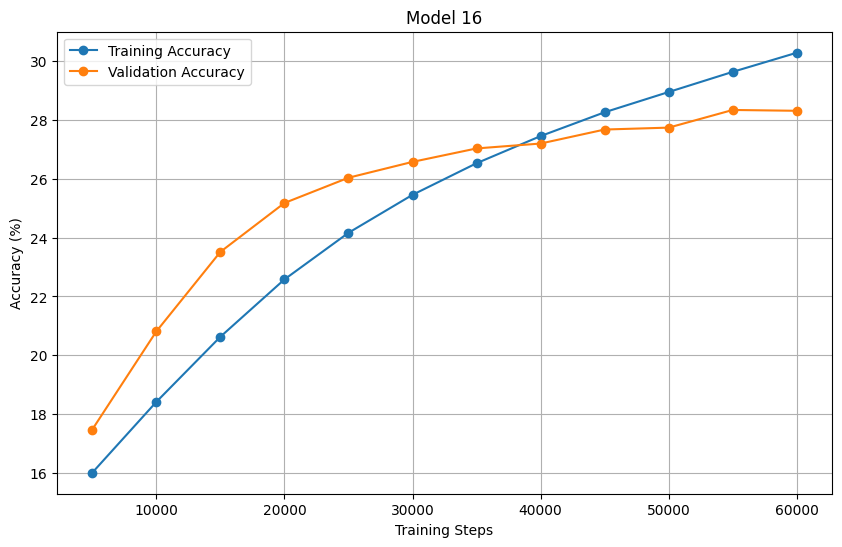

In [16]:
import matplotlib.pyplot as plt
import numpy as np

train_accuracy = [
    16.0174, 18.4199, 20.63, 22.5769, 24.159,
    25.448, 26.5206, 27.442, 28.2504, 28.9379, 
    29.6216, 30.2708
]

validation_accuracy = [
    17.4823, 20.8115, 23.5111, 25.1705, 26.0281,
    26.566, 27.0227, 27.1887, 27.6642, 27.7289,
    28.3283, 28.3000
]

training_steps = [5000, 10000, 15000,20000,25000,30000,35000,
                  40000,45000,50000,55000, 60000]


plt.figure(figsize=(10, 6))
plt.plot(training_steps, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(training_steps, validation_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Training Steps')
plt.ylabel('Accuracy (%)')
plt.title('Model 16')
plt.legend()
plt.grid(True)
plt.show()



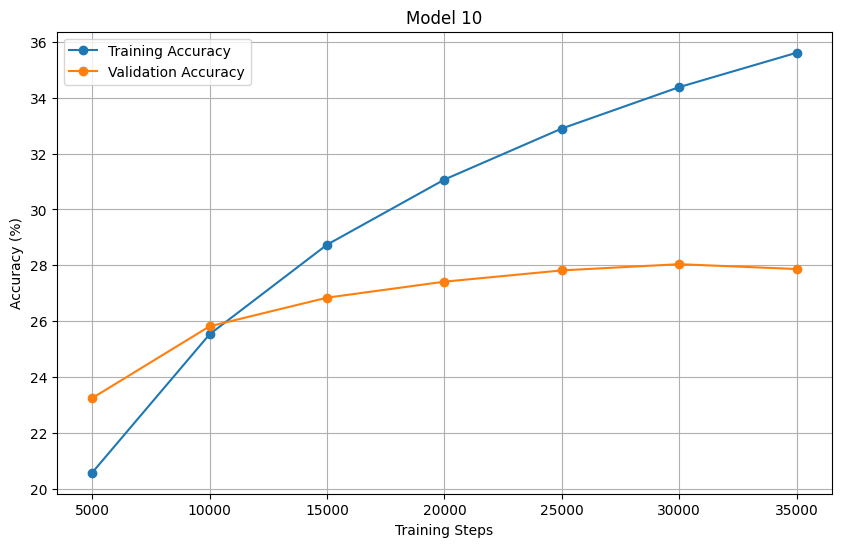

In [15]:
import matplotlib.pyplot as plt
import numpy as np

train_accuracy = [
    20.5693, 25.5258, 28.7351, 31.0686, 32.8971,
    34.38, 35.6115
]

validation_accuracy = [
    23.2403, 25.8126, 26.8386, 27.4115, 27.8156,
    28.038, 27.864
]


training_steps = [5000, 10000, 15000,20000,25000,30000,35000]


plt.figure(figsize=(10, 6))
plt.plot(training_steps, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(training_steps, validation_accuracy, label='Validation Accuracy', marker='o')
plt.xlabel('Training Steps')
plt.ylabel('Accuracy (%)')
plt.title('Model 10')
plt.legend()
plt.grid(True)
plt.show()


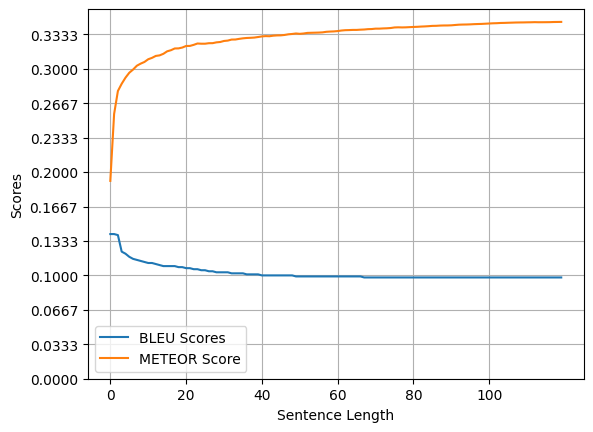

In [20]:
import matplotlib.pyplot as plt

# Your list of BLEU scores
bleu_scores = [14.0,
    14.0, 13.9, 12.3, 12.1, 11.8, 11.6, 11.5, 11.4, 11.3,
    11.2, 11.2, 11.1, 11.0, 10.9, 10.9, 10.9, 10.9, 10.8, 10.8,
    10.7, 10.7, 10.6, 10.6, 10.5, 10.5, 10.4, 10.4, 10.3, 10.3,
    10.3, 10.3, 10.2, 10.2, 10.2, 10.2, 10.1, 10.1, 10.1, 10.1,
    10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 9.9,
    9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.9,
    9.9, 9.9, 9.9, 9.9, 9.9, 9.9, 9.8, 9.8, 9.8, 9.8, 9.8,
    9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8,
    9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8,
    9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8,
    9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8, 9.8,
    9.8, 9.8, 9.8, 9.8]

# Your list of Meteor scores
# Your list of Meteor scores
# Your list of Meteor scores
# Your list of Meteor scores
meteor_scores = [0.1914772306242109, 0.2562291080664645, 0.2784677660847538, 0.28546963369124295, 
                 0.2913512195085848, 0.2961221248577489, 0.29920416038086955, 0.30291314108704187, 
                 0.3049304178238069, 0.30655531445104295, 0.30918530067037886, 0.31052475155061626, 
                 0.31240277313617537, 0.31293693888945173, 0.31444756673009355, 0.3168610932886051, 
                 0.31794202765626844, 0.3196229098316051, 0.3197042027280824, 0.32051094791039525, 
                 0.3220257029364572, 0.3220849746126811, 0.32311571356734825, 0.3244253825097161, 
                 0.32422558471140905, 0.32422395175442736, 0.3247127693626761, 0.3247560737311904, 
                 0.32553416182813144, 0.32587991344367895, 0.3268831901520631, 0.32724196399408756, 
                 0.3282279912968773, 0.328286662656924, 0.3289161172174961, 0.32943434223666446, 
                 0.32978157032814176, 0.3299407072698749, 0.330171186898224, 0.33070384968339916, 
                 0.3312819945767746, 0.33159243439535546, 0.33146941919862705, 0.3319953171169278, 
                 0.33225024773694567, 0.33232026356273864, 0.33270310616415544, 0.3333332106681736, 
                 0.33366037852890323, 0.33411659138422584, 0.3337819221359432, 0.33410728417902463, 
                 0.33468062595289655, 0.334796389599768, 0.33490025466705436, 0.3350039593107677, 
                 0.3352108987227892, 0.3357496405219988, 0.33598139925998505, 0.3361358214764555, 
                 0.33645854882694115, 0.33699352683255795, 0.33731199955159724, 0.33741697814852045, 
                 0.3375746854087533, 0.33757909647226547, 0.33780705203945777, 0.3379713690315384, 
                 0.33831738864842065, 0.33843014423847584, 0.33880833376057407, 0.3388079304156305, 
                 0.33902171710239815, 0.3391550958763613, 0.339415549614, 0.33995696105798623, 
                 0.34009027392371616, 0.3399868534700343, 0.3400706891070061, 0.340267035387892, 
                 0.3404364789352688, 0.3405835385337837, 0.3408114242525224, 0.34097183274250037, 
                 0.34119657498790557, 0.3414798892690473, 0.3415471722747171, 0.34176966424421057, 
                 0.34187602351338076, 0.3418942638978021, 0.34202695193420474, 0.34234394138665336, 
                 0.34263964721254747, 0.3427579459330491, 0.34282523841590745, 0.34295073852029556, 
                 0.3431511050088634, 0.3432807220785243, 0.34338568488585874, 0.3435842854567411,
                0.3437859092630947, 0.34398468707818114, 0.34409457842504965, 0.34430117558352474, 
                0.34437659268009285, 0.3445076700014773, 0.34461463576873896, 0.344738752605358, 
                0.34479897311465485, 0.3448348607457373, 0.3449210488436843, 0.3449692107042211, 
                0.3450838842079734, 0.3450002077558727, 0.34502200141200584, 0.3450523407222961, 
                0.3450915574313058, 0.34522966778695563, 0.3452778297896642, 0.34533365112043235]


# Normalize BLEU scores to the range [0, 1]
bleu_scores = [score / 100 for score in bleu_scores]
sentence_lengths = list(range(0, 120))
# Create a list of sentence lengths from 0 to 1 with an increment of 0.01


# Plotting the BLEU scores against sentence lengths
plt.plot(sentence_lengths, bleu_scores, linestyle='-', label = "BLEU Scores")
plt.plot(sentence_lengths, meteor_scores, linestyle='-', label = "METEOR Score")
plt.xlabel('Sentence Length')
plt.ylabel('Scores')
plt.xticks(list(range(0, 120, 20)))
plt.yticks([i / 30 for i in range(11)])
plt.legend()
plt.grid(True)
plt.show()

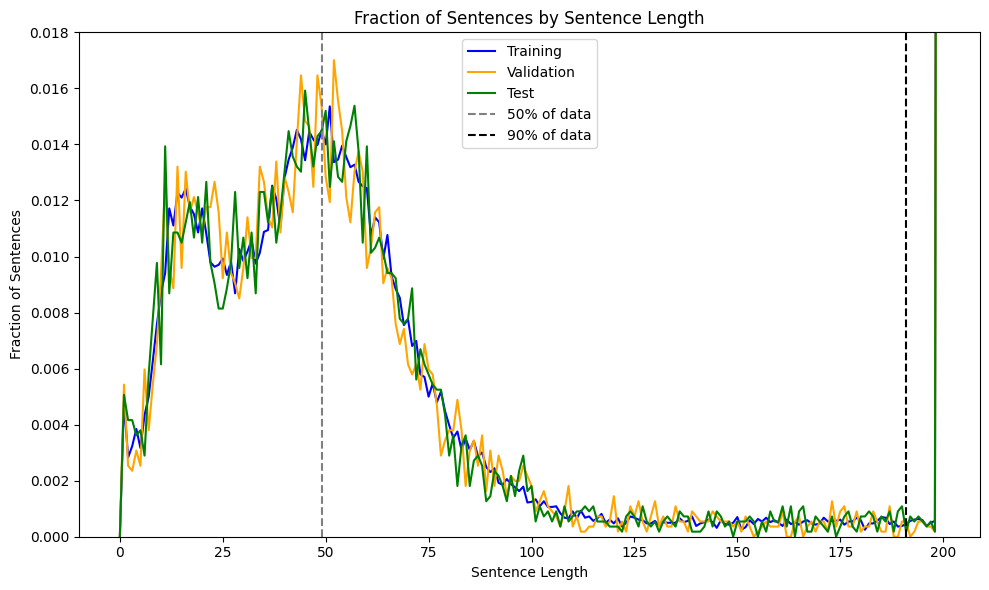

In [36]:
import os
import numpy as np
import matplotlib.pyplot as plt

# read sentences from a text file
def read_sentences_from_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        return [line.strip() for line in file.readlines()]

# calculate sentence lengths
def calculate_sentence_lengths(sentences, max_length=200):
    lengths = []
    for sentence in sentences:
        words = sentence.split()
        if len(words) > max_length:
            lengths.append(max_length)
        else:
            lengths.append(len(words))
    return lengths

# calculate fraction of sentences within each length range
def calculate_fraction_of_sentences(lengths, bin_edges):
    counts, _ = np.histogram(lengths, bins=bin_edges)
    total_sentences = len(lengths)
    return counts / total_sentences

# Function to plot line chart for sentence length distribution
def plot_sentence_length_distribution(lengths, label, color):
    bin_edges = range(0, max(lengths) + 1)
    fraction = calculate_fraction_of_sentences(lengths, bin_edges)
    plt.plot(bin_edges[:-1], fraction, label=label, color=color)

    return fraction

# Define file paths for training, validation, and test data
train_file = 'train_texts_grc.txt'
val_file = 'valid_texts_grc.txt'
test_file = 'test_texts_grc.txt'

# Read sentences from files
train_sentences = read_sentences_from_file(train_file)
val_sentences = read_sentences_from_file(val_file)
test_sentences = read_sentences_from_file(test_file)

# Calculate sentence lengths for each split
train_lengths = calculate_sentence_lengths(train_sentences)
val_lengths = calculate_sentence_lengths(val_sentences)
test_lengths = calculate_sentence_lengths(test_sentences)

# Concatenate lengths from all sets
all_lengths = train_lengths + val_lengths + test_lengths

# Plot line chart for sentence length distribution of all sets combined
plt.figure(figsize=(10, 6))

# Plot for training data
train_fraction = plot_sentence_length_distribution(train_lengths, 'Training', 'blue')

# Plot for validation data
val_fraction = plot_sentence_length_distribution(val_lengths, 'Validation', 'orange')

# Plot for test data
test_fraction = plot_sentence_length_distribution(test_lengths, 'Test', 'green')

plt.title('Fraction of Sentences by Sentence Length')
plt.xlabel('Sentence Length')
plt.ylabel('Fraction of Sentences')

# Combine fractions for all sets
combined_fraction = np.array(train_fraction) + np.array(val_fraction) + np.array(test_fraction)

# Calculate percentiles
bin_edges = range(0, max(all_lengths) + 1)
percentile_50 = np.percentile(all_lengths, 50)
percentile_90 = np.percentile(all_lengths, 90)

# Plot vertical lines for percentiles
plt.axvline(x=percentile_50, linestyle='--', color='gray')
plt.axvline(x=percentile_90, linestyle='--', color='black')

# Add legend for percentile lines
plt.legend(['Training', 'Validation', 'Test', '50% of data', '90% of data'])

# Set y-axis limit to 0.02
plt.ylim(0, 0.018)

plt.tight_layout()
plt.show()



